# Lending Game

## Libraries imports

In [4]:
%load_ext jupyter_black

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from tqdm import tqdm

In [6]:
import warnings

# from pandas.errors import FutureWarning

warnings.simplefilter(action="ignore", category=FutureWarning)

## Download data

In [7]:
df_past = pd.read_csv("../data/PastLoans.csv")
df_past

,sex,employment,married,income,digital1,digital2,digital3,default
0,1,employed,1,33610,0.705613,0.068107,0.167038,0
1,1,employed,1,20650,0.000000,0.091152,0.000000,1
2,1,employed,1,8504,0.637625,0.000000,0.066207,0
3,1,employed,1,18460,0.276120,0.548380,0.625448,0
4,0,employed,0,8811,0.001974,0.500731,0.000000,1
...,...,...,...,...,...,...,...,...
99995,0,retired,1,24785,0.000000,0.206613,0.000000,1
99996,1,employed,1,23353,0.000000,0.499002,0.367185,0
99997,1,employed,1,6770,0.000000,0.125227,0.000000,0
99998,1,student,0,61856,0.807840,0.827529,0.772643,0


In [8]:
df_past.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   sex         100000 non-null  int64  
 1   employment  100000 non-null  object 
 2   married     100000 non-null  int64  
 3   income      100000 non-null  int64  
 4   digital1    100000 non-null  float64
 5   digital2    100000 non-null  float64
 6   digital3    100000 non-null  float64
 7   default     100000 non-null  int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 6.1+ MB


In [9]:
df_new = pd.read_csv("../data/NewApplications_Lender3.csv")
df_new

,id,sex,employment,married,income,digital3
0,1,1,unemployed,1,16514,0.000000
1,2,0,employed,1,8842,0.000000
2,3,0,employed,0,19424,0.596771
3,4,1,unemployed,1,7418,0.622311
4,5,1,retired,0,843,0.388930
...,...,...,...,...,...,...
99995,99996,1,student,0,0,0.933285
99996,99997,1,employed,1,18066,0.567901
99997,99998,1,employed,0,7273,0.669176
99998,99999,1,employed,1,8238,0.075339


In [10]:
y_new = pd.read_csv("../data/Round1_Diagnostic_31.csv")[["id", "default"]]
y_new

,id,default
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
...,...,...
99995,99996,0
99996,99997,0
99997,99998,0
99998,99999,0


## EDA

### Past Data

In [11]:
df_past

,sex,employment,married,income,digital1,digital2,digital3,default
0,1,employed,1,33610,0.705613,0.068107,0.167038,0
1,1,employed,1,20650,0.000000,0.091152,0.000000,1
2,1,employed,1,8504,0.637625,0.000000,0.066207,0
3,1,employed,1,18460,0.276120,0.548380,0.625448,0
4,0,employed,0,8811,0.001974,0.500731,0.000000,1
...,...,...,...,...,...,...,...,...
99995,0,retired,1,24785,0.000000,0.206613,0.000000,1
99996,1,employed,1,23353,0.000000,0.499002,0.367185,0
99997,1,employed,1,6770,0.000000,0.125227,0.000000,0
99998,1,student,0,61856,0.807840,0.827529,0.772643,0


In [12]:
df_past.isna().sum()

sex           0
employment    0
married       0
income        0
digital1      0
digital2      0
digital3      0
default       0
dtype: int64

<AxesSubplot:>

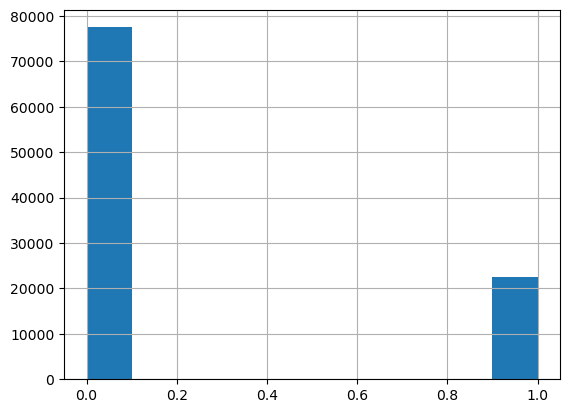

In [13]:
df_past.default.hist()

In [14]:
numerical_col = ["digital1", "digital2", "digital3", "income"]

<AxesSubplot:ylabel='employment'>

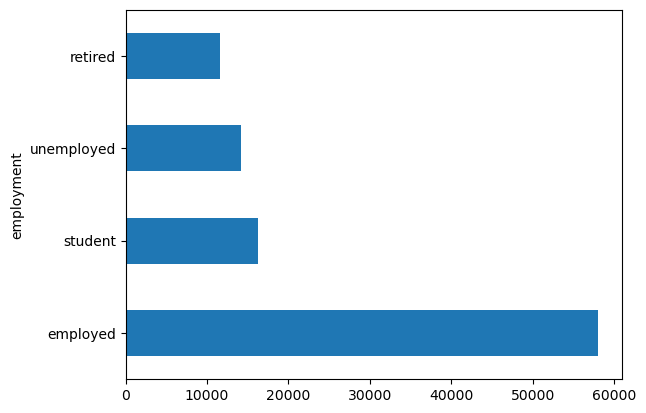

In [15]:
df_past.employment.value_counts().plot(kind="barh")

In [16]:
df_encoded = pd.get_dummies(
    df_past, columns=["employment"], prefix=["is_"], dtype="int"
)
df_encoded

,sex,married,income,digital1,digital2,digital3,default,is__employed,is__retired,is__student,is__unemployed
0,1,1,33610,0.705613,0.068107,0.167038,0,1,0,0,0
1,1,1,20650,0.000000,0.091152,0.000000,1,1,0,0,0
2,1,1,8504,0.637625,0.000000,0.066207,0,1,0,0,0
3,1,1,18460,0.276120,0.548380,0.625448,0,1,0,0,0
4,0,0,8811,0.001974,0.500731,0.000000,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1,24785,0.000000,0.206613,0.000000,1,0,1,0,0
99996,1,1,23353,0.000000,0.499002,0.367185,0,1,0,0,0
99997,1,1,6770,0.000000,0.125227,0.000000,0,1,0,0,0
99998,1,0,61856,0.807840,0.827529,0.772643,0,0,0,1,0


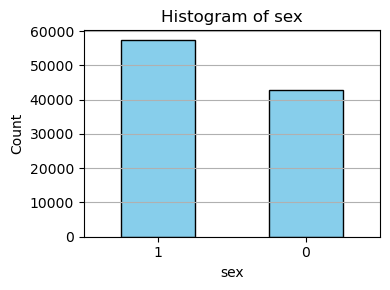

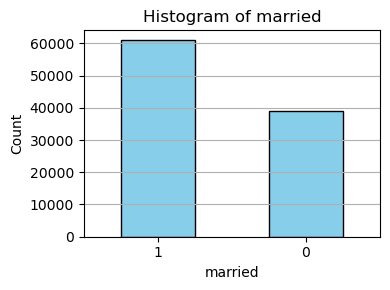

In [17]:
for col in ["sex", "married"]:
    plt.figure(figsize=(4, 3))
    df_encoded[col].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.grid(axis="y")
    plt.tight_layout()
    plt.show()

array([[<AxesSubplot:title={'center':'digital1'}>,
        <AxesSubplot:title={'center':'digital2'}>],
       [<AxesSubplot:title={'center':'digital3'}>,
        <AxesSubplot:title={'center':'income'}>]], dtype=object)

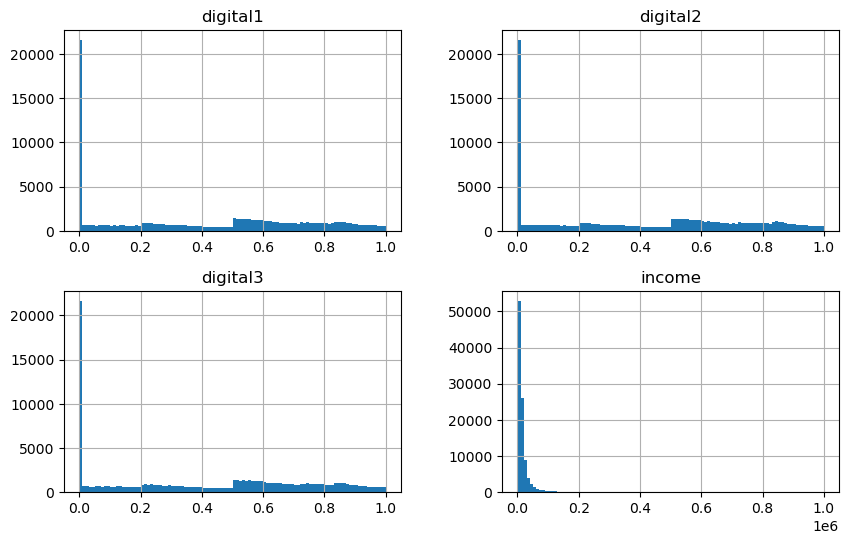

In [18]:
df_encoded[numerical_col].hist(bins=100, figsize=(10, 6))

<AxesSubplot:>

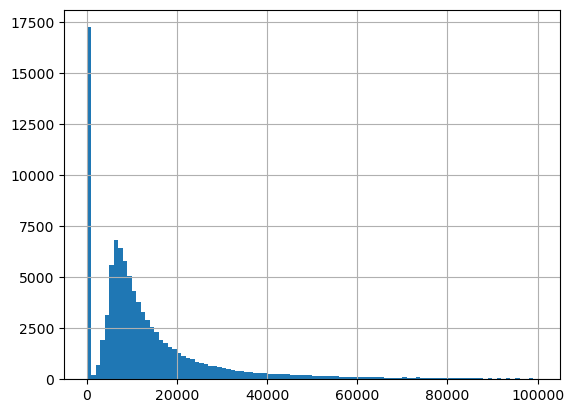

In [19]:
df_encoded.income[df_past.income < 100000].hist(bins=100)

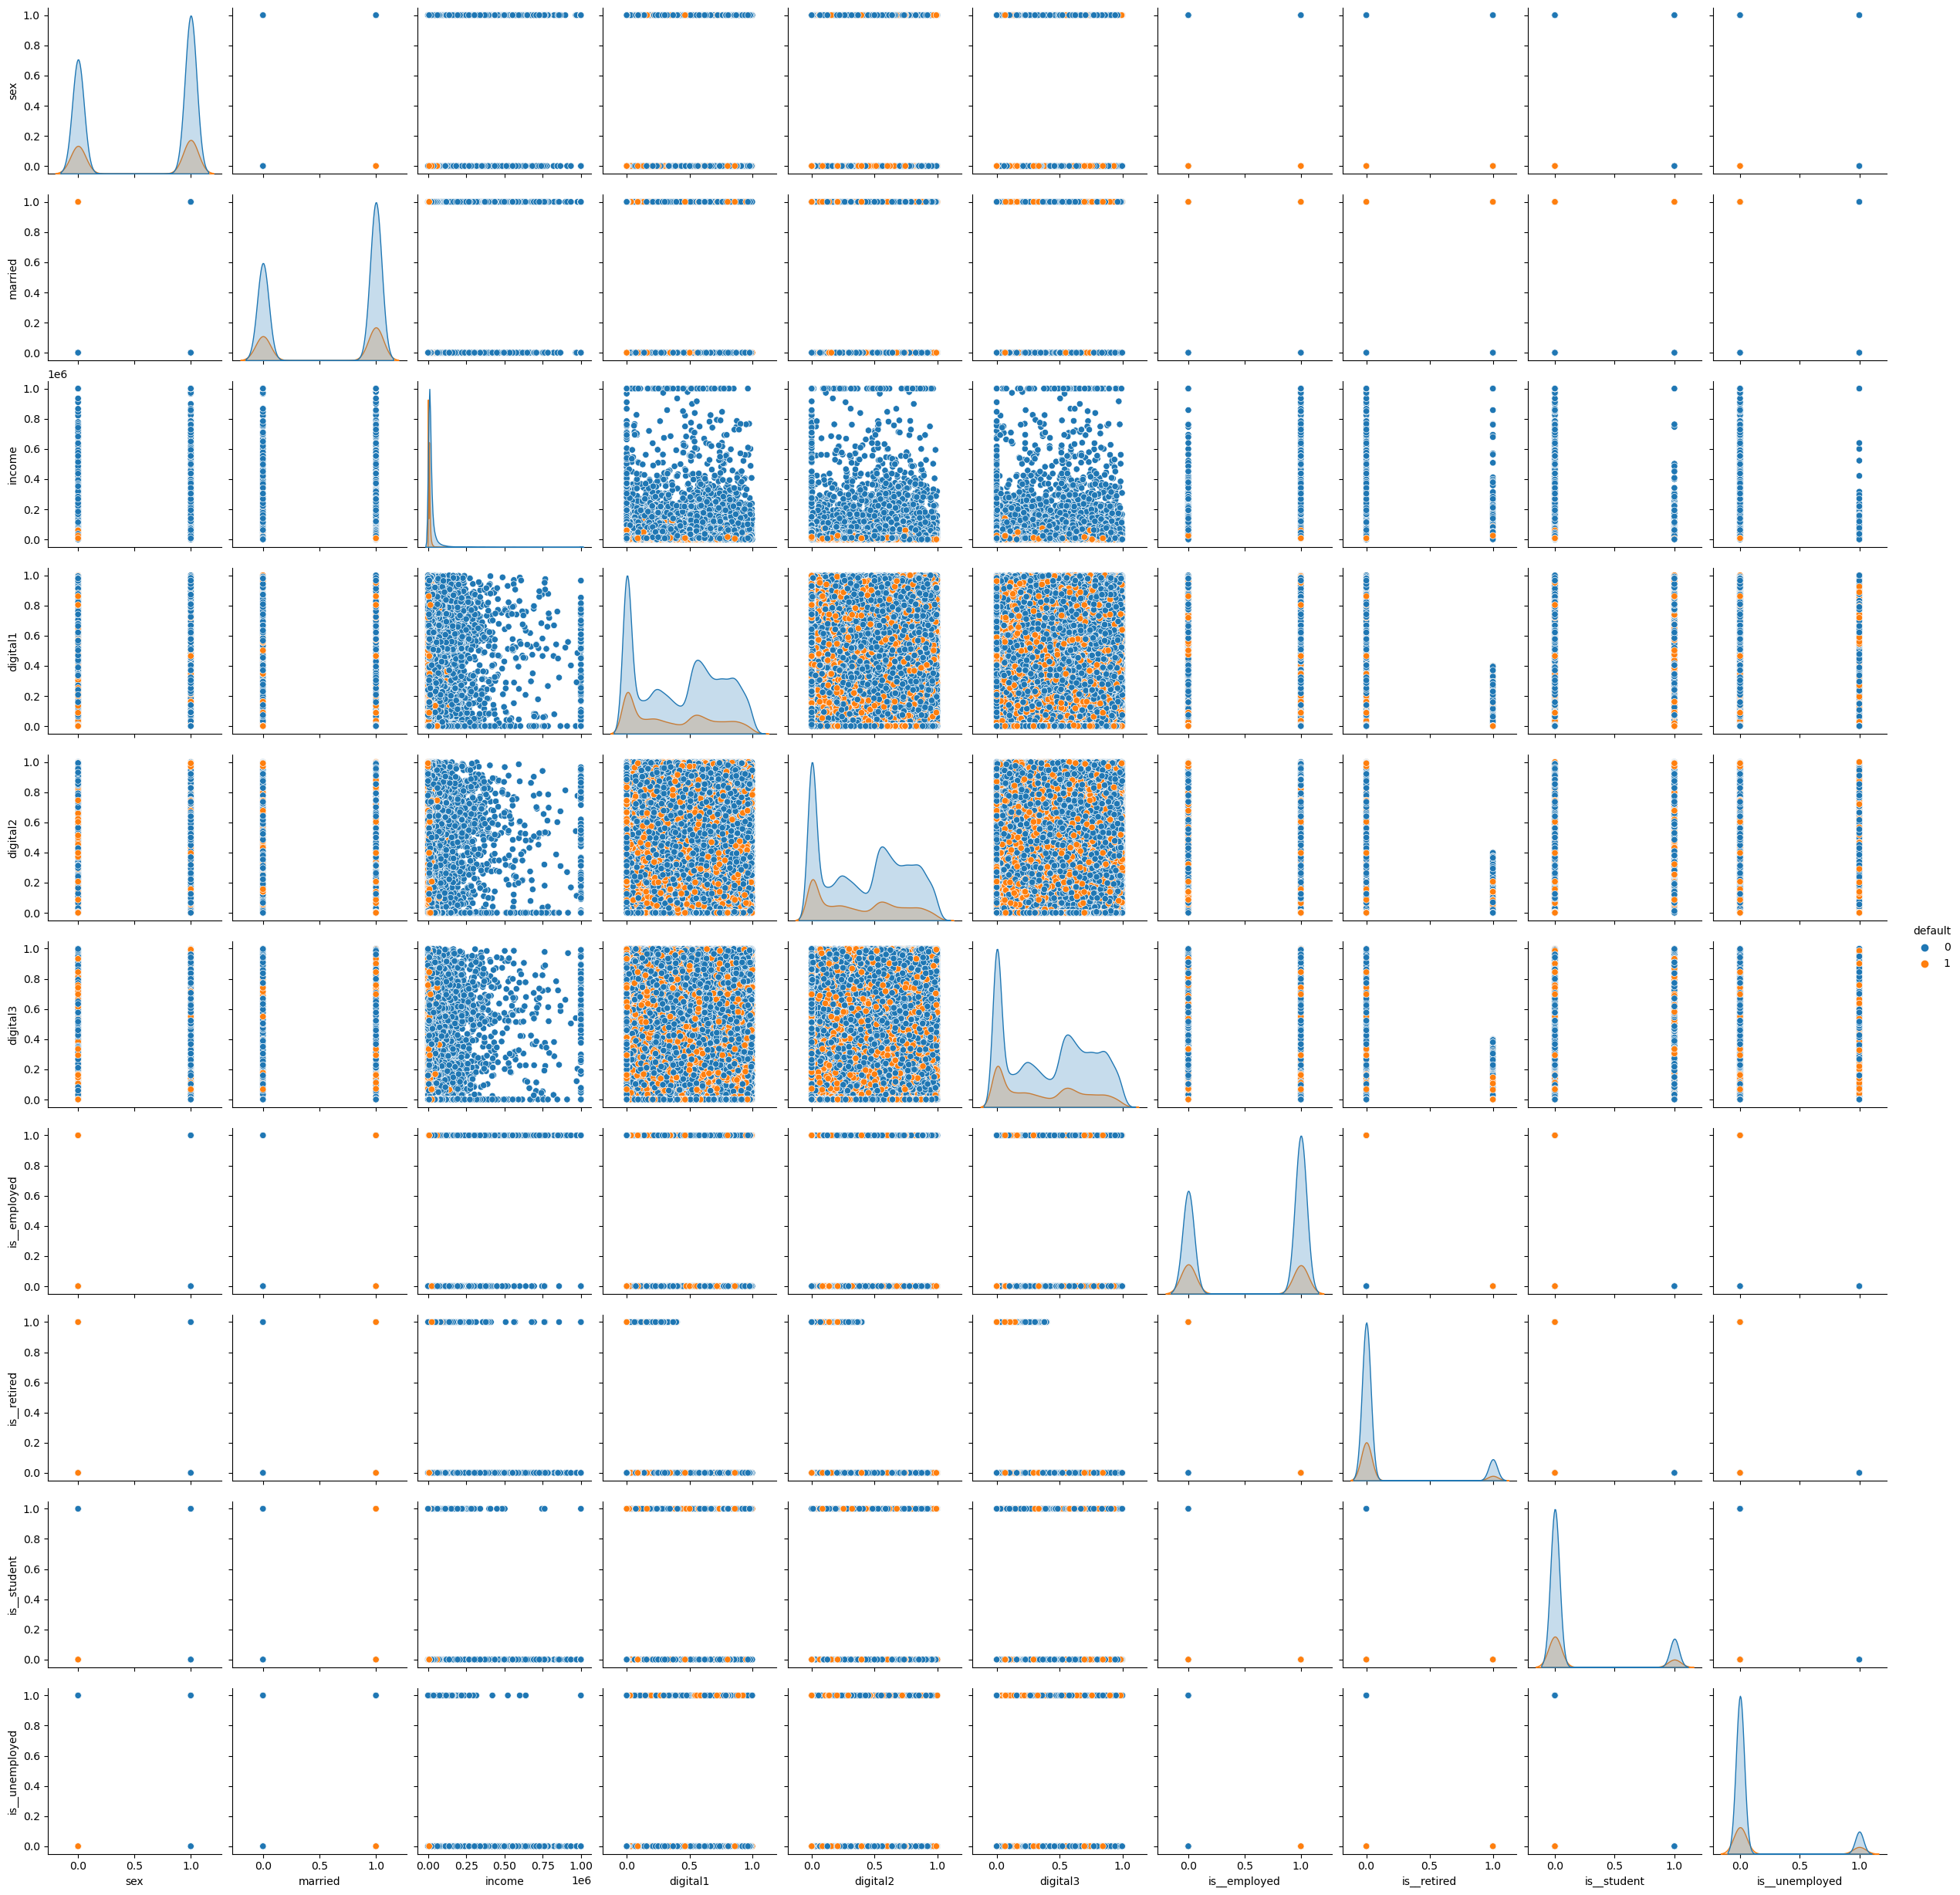

In [20]:
sns.pairplot(df_encoded, hue="default")

<AxesSubplot:>

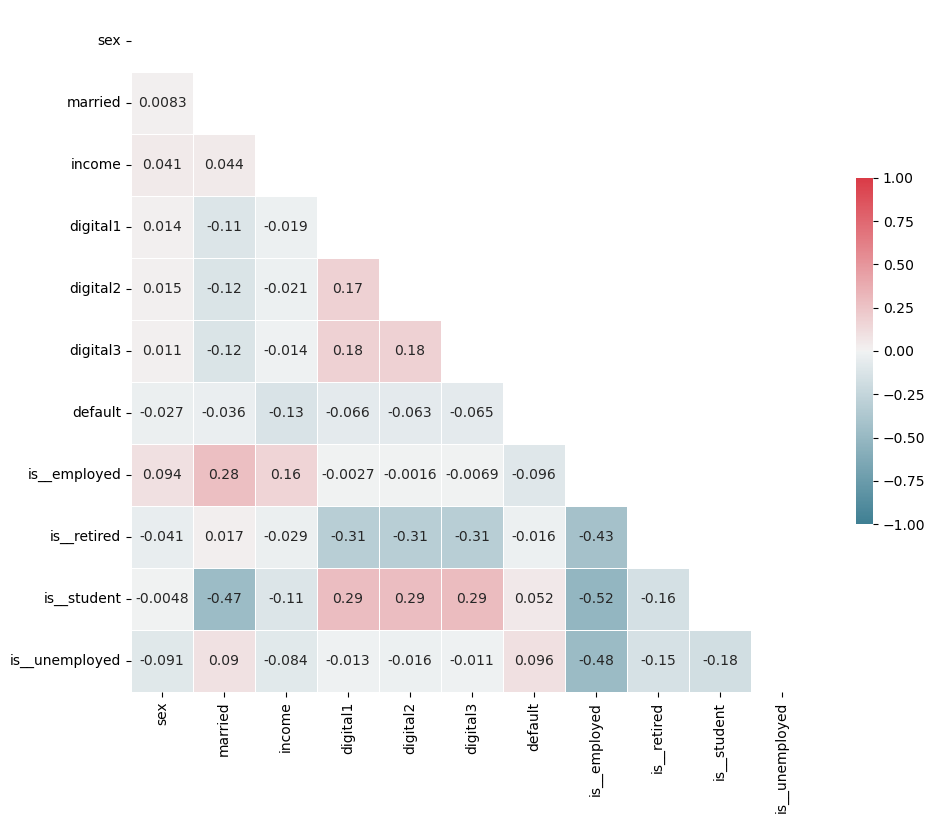

In [21]:
# Create the correlation matrix
corr = df_encoded.corr()

# Generate a mask for the upper triangle; True = do NOT show
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# More details at https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(
    corr,  # The data to plot
    mask=mask,  # Mask some cells
    cmap=cmap,  # What colors to plot the heatmap as
    annot=True,  # Should the values be plotted in the cells?
    vmax=1,  # The maximum value of the legend. All higher vals will be same color
    vmin=-1,  # The minimum value of the legend. All lower vals will be same color
    center=0,  # The center value of the legend. With divergent cmap, where white is
    square=True,  # Force cells to be square
    linewidths=0.5,  # Width of lines that divide cells
    cbar_kws={
        "shrink": 0.5
    },  # Extra kwargs for the legend; in this case, shrink by 50%
)

## Feature Engineering

In [22]:
df_eng = df_past.copy().drop(columns=["digital1", "digital2"])
df_eng

,sex,employment,married,income,digital3,default
0,1,employed,1,33610,0.167038,0
1,1,employed,1,20650,0.000000,1
2,1,employed,1,8504,0.066207,0
3,1,employed,1,18460,0.625448,0
4,0,employed,0,8811,0.000000,1
...,...,...,...,...,...,...
99995,0,retired,1,24785,0.000000,1
99996,1,employed,1,23353,0.367185,0
99997,1,employed,1,6770,0.000000,0
99998,1,student,0,61856,0.772643,0


In [23]:
# Define transformations
transformations = {
    "Log": lambda x: np.log(x + 1),
    "Square root": np.sqrt,
    "Box-Cox": lambda x: stats.boxcox(x + 1)[0],  # +1 to handle zeros
    "Yeo-Johnson": lambda x: stats.yeojohnson(x)[0],
}

# Apply transformations and compute KS statistic
results = {}
for name, func in transformations.items():
    transformed_data = func(df_eng.income)
    ks_stat, ks_p_value = stats.kstest(transformed_data, "norm")
    results[name] = ks_stat

# Print KS statistics
print("KS Statistics for each transformation:")
for name, ks_stat in results.items():
    print(f"{name}: {ks_stat:.4f}")

KS Statistics for each transformation:
Log: 0.8291
Square root: 0.8292
Box-Cox: 0.8292
Yeo-Johnson: 0.8292


In [24]:
# Define transformations
transformations = {
    "Log": lambda x: np.log(x + 1),
    "Square root": np.sqrt,
    "Box-Cox": lambda x: stats.boxcox(x + 1)[0],  # +1 to handle zeros
    "Yeo-Johnson": lambda x: stats.yeojohnson(x)[0],
}

# Apply transformations and compute KS statistic
results = {}
for name, func in transformations.items():
    transformed_data = func(df_eng.income[df_eng.income.ge(1)])
    ks_stat, ks_p_value = stats.kstest(transformed_data, "norm")
    results[name] = ks_stat

# Print KS statistics
print("KS Statistics for each transformation:")
for name, ks_stat in results.items():
    print(f"{name}: {ks_stat:.4f}")

KS Statistics for each transformation:
Log: 0.9999
Square root: 1.0000
Box-Cox: 0.9994
Yeo-Johnson: 0.9994


<AxesSubplot:>

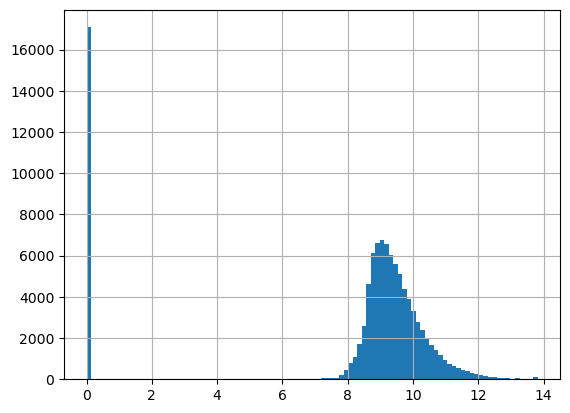

In [25]:
df_eng.income = df_eng.income.apply(lambda x: np.log(1 + x))
df_eng.income.hist(bins=100)

In [26]:
df_eng["interac_sex_employment"] = (
    df_eng.sex.astype(str) + "_" + df_eng.employment.astype(str)
)

df_eng["interac_married_employment"] = (
    df_eng.married.astype(str) + "_" + df_eng.employment.astype(str)
)
df_eng["interac_sex_married"] = (
    df_eng.sex.astype(str) + "_" + df_eng.married.astype(str)
)

df_eng["interac_sex_employment_married"] = (
    df_eng.sex.astype(str)
    + "_"
    + df_eng.employment.astype(str)
    + "_"
    + df_eng.married.astype(str)
)

In [27]:
from sklearn import preprocessing

# Columns to be transformed
cols = ["income", "digital3"]

# initialize polynomial features class object for two-degree polynomial features
pf = preprocessing.PolynomialFeatures(
    (2, 2), interaction_only=False, include_bias=False
)

# fit to the features
pf.fit(df_eng[cols])

# create polynomial features
poly_feats = pf.transform(df_eng[cols])

# get feature names
feature_names = pf.get_feature_names_out(input_features=cols)

# create a dataframe with all the features
df_transformed = pd.DataFrame(poly_feats, columns=feature_names)

# add the new features to the original dataframe
df_eng = pd.concat([df_eng, df_transformed], axis=1)

In [28]:
categorical_col = [
    "sex",
    "employment",
    "married",
    "interac_sex_employment",
    "interac_married_employment",
    "interac_sex_married",
    "interac_sex_employment_married",
]

In [29]:
def encode_features_and_target(
    df: pd.DataFrame, columns: list, target: str, encoding_type: str = "feature"
) -> pd.DataFrame:
    """
    Encodes the specified columns using one-hot encoding or target encoding based on the encoding_type.

    Parameters:
    - df: Input dataframe
    - columns: List of columns to be encoded
    - target: Target column for target encoding (only used if encoding_type is 'target')
    - encoding_type: Type of encoding ('feature' for one-hot encoding, 'target' for target encoding)

    Returns:
    - Encoded dataframe
    """

    if encoding_type == "feature":
        # Target encode the specified columns
        df_encoded = pd.DataFrame()
        for col in columns:
            mean = df.groupby(col)[target].count()
            df_encoded[col + "_feat_encod"] = df[col].map(mean)

    elif encoding_type == "target":
        # Target encode the specified columns
        df_encoded = pd.DataFrame()
        for col in columns:
            mean = df.groupby(col)[target].mean()
            df_encoded[col + "_targ_encod"] = df[col].map(mean)

    else:
        raise ValueError("Invalid encoding_type. Choose either 'feature' or 'target'.")

    return df_encoded

In [30]:
df_encoded_target = encode_features_and_target(
    df_eng, categorical_col, "default", encoding_type="target"
)

df_encoded_feature = encode_features_and_target(
    df_eng, categorical_col, "default", encoding_type="feature"
)

In [31]:
df_eng = pd.concat([df_eng, df_encoded_target, df_encoded_feature], axis=1)

## Data Encoding

In [166]:
df_encoded = df_eng.copy()

In [167]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   sex                                        100000 non-null  int64  
 1   employment                                 100000 non-null  object 
 2   married                                    100000 non-null  int64  
 3   income                                     100000 non-null  float64
 4   digital3                                   100000 non-null  float64
 5   default                                    100000 non-null  int64  
 6   interac_sex_employment                     100000 non-null  object 
 7   interac_married_employment                 100000 non-null  object 
 8   interac_sex_married                        100000 non-null  object 
 9   interac_sex_employment_married             100000 non-null  object 
 10  income^2 

In [168]:
float_columns = df_encoded.select_dtypes(include=[np.float64]).columns
int_columns = df_encoded.select_dtypes(include=[np.int64]).columns
cat_columns = list(df_encoded.select_dtypes(include=[object]).columns) + [
    "sex",
    "married",
]

In [169]:
df_encoded[float_columns] = df_encoded[float_columns].astype(np.float32)
df_encoded[int_columns] = df_encoded[int_columns].astype(np.int32)
df_encoded[cat_columns] = df_encoded[cat_columns].astype("category")

In [170]:
df_encoded = pd.get_dummies(
    df_encoded, columns=cat_columns, prefix="is_", dtype=np.int8
)

In [171]:
len(list(df_encoded.columns))

64

In [172]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 64 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0   income                                     100000 non-null  float32
 1   digital3                                   100000 non-null  float32
 2   default                                    100000 non-null  int32  
 3   income^2                                   100000 non-null  float32
 4   income digital3                            100000 non-null  float32
 5   digital3^2                                 100000 non-null  float32
 6   sex_targ_encod                             100000 non-null  float32
 7   employment_targ_encod                      100000 non-null  float32
 8   married_targ_encod                         100000 non-null  float32
 9   interac_sex_employment_targ_encod          100000 non-null  float32
 10  interac_m

## Feature selection - First round

In [173]:
df_encoded

,income,digital3,default,income^2,income digital3,digital3^2,sex_targ_encod,employment_targ_encod,married_targ_encod,interac_sex_employment_targ_encod,...,is__1_retired_0,is__1_retired_1,is__1_student_0,is__1_student_1,is__1_unemployed_0,is__1_unemployed_1,is__0,is__1,is__0,is__1
0,10.422608,0.167038,0,108.630768,1.740972,0.027902,0.215137,0.190833,0.213043,0.186054,...,0,0,0,0,0,0,0,1,0,1
1,9.935519,0.000000,1,98.714539,0.000000,0.000000,0.215137,0.190833,0.213043,0.186054,...,0,0,0,0,0,0,0,1,0,1
2,9.048409,0.066207,0,81.873718,0.599073,0.004383,0.215137,0.190833,0.213043,0.186054,...,0,0,0,0,0,0,0,1,0,1
3,9.823416,0.625448,0,96.499496,6.144040,0.391186,0.215137,0.190833,0.213043,0.186054,...,0,0,0,0,0,0,0,1,0,1
4,9.083870,0.000000,1,82.516685,0.000000,0.000000,0.238065,0.190833,0.243484,0.198398,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,10.118034,0.000000,1,102.374619,0.000000,0.000000,0.238065,0.206162,0.213043,0.219849,...,0,0,0,0,0,0,1,0,0,1
99996,10.058523,0.367185,0,101.173897,3.693339,0.134825,0.215137,0.190833,0.213043,0.186054,...,0,0,0,0,0,0,0,1,0,1
99997,8.820404,0.000000,0,77.799530,0.000000,0.000000,0.215137,0.190833,0.213043,0.186054,...,0,0,0,0,0,0,0,1,0,1
99998,11.032580,0.772643,0,121.717834,8.524243,0.596977,0.215137,0.274310,0.243484,0.266407,...,0,0,1,0,0,0,0,1,1,0


In [174]:
corr = df_encoded.corr()
corr

,income,digital3,default,income^2,income digital3,digital3^2,sex_targ_encod,employment_targ_encod,married_targ_encod,interac_sex_employment_targ_encod,...,is__1_retired_0,is__1_retired_1,is__1_student_0,is__1_student_1,is__1_unemployed_0,is__1_unemployed_1,is__0,is__1,is__0,is__1
income,1.000000,-0.156200,-0.241488,0.977376,0.472066,-0.187930,-0.067121,-0.627522,-0.245288,-0.623661,...,0.051836,0.069206,-0.365359,-0.101883,-0.110526,-0.178115,-0.067121,0.067121,-0.245288,0.245288
digital3,-0.156200,1.000000,-0.065005,-0.136238,0.703554,0.958969,-0.011261,0.138935,0.118223,0.137333,...,-0.130762,-0.171356,0.200555,0.061203,-0.002857,-0.005607,-0.011261,0.011261,0.118223,-0.118223
default,-0.241488,-0.065005,1.000000,-0.269801,-0.174357,-0.066905,0.027161,0.119287,0.035563,0.120611,...,-0.004903,-0.019949,0.031730,0.004072,0.039535,0.045806,0.027161,-0.027161,0.035563,-0.035563
income^2,0.977376,-0.136238,-0.269801,1.000000,0.469416,-0.166989,-0.080685,-0.596279,-0.228384,-0.594961,...,0.035585,0.048931,-0.346082,-0.097386,-0.103866,-0.167327,-0.080685,0.080685,-0.228384,0.228384
income digital3,0.472066,0.703554,-0.174357,0.469416,1.000000,0.631471,-0.041493,-0.233483,-0.075047,-0.231990,...,-0.090512,-0.118452,-0.087899,-0.019734,-0.045811,-0.077310,-0.041493,0.041493,-0.075047,0.075047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
is__1_unemployed_1,-0.178115,-0.005607,0.045806,-0.167327,-0.077310,-0.010552,-0.192077,0.439678,-0.178089,0.423069,...,-0.033648,-0.043941,-0.067480,-0.020257,-0.030373,1.000000,-0.192077,0.192077,-0.178089,0.178089
is__0,-0.067121,-0.011261,0.027161,-0.080685,-0.041493,-0.010708,1.000000,0.091019,0.008325,0.225192,...,-0.130380,-0.170262,-0.261469,-0.078492,-0.117689,-0.192077,1.000000,-1.000000,0.008325,-0.008325
is__1,0.067121,0.011261,-0.027161,0.080685,0.041493,0.010708,-1.000000,-0.091019,-0.008325,-0.225192,...,0.130380,0.170262,0.261469,0.078492,0.117689,0.192077,-1.000000,1.000000,-0.008325,0.008325
is__0,-0.245288,0.118223,0.035563,-0.228384,-0.075047,0.145408,0.008325,0.205528,1.000000,0.203366,...,0.188941,-0.157862,0.378910,-0.072775,0.170550,-0.178089,0.008325,-0.008325,1.000000,-1.000000


In [175]:
# import pandas as pd
# from sklearn import linear_model
# from sklearn import metrics
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import roc_auc_score


# class GreedyFeatureSelection:
#     """
#     A simple and custom class for greedy feature selection. You will need to modify it quite a bit to make it suitable for your dataset.
#     """

#     def evaluate_oof_auc(self, X, y, n_folds=5):
#         """
#         Computes the out-of-fold (OOF) AUC for a given number of folds and returns the mean AUC over the k folds.

#         Parameters:
#         - X: Features DataFrame
#         - y: Target Series
#         - n_folds: Number of folds for cross-validation (default is 5)

#         Returns:
#         - Mean AUC over the k folds
#         """

#         skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
#         oof_predictions = np.zeros(X.shape[0])
#         model = linear_model.LogisticRegression()

#         for train_index, valid_index in skf.split(X, y):
#             X_train, X_valid = X[train_index], X[valid_index]
#             y_train, y_valid = y[train_index], y[valid_index]

#             model.fit(X_train, y_train)
#             oof_predictions[valid_index] = model.predict_proba(X_valid)[:, 1]

#         oof_auc = roc_auc_score(y, oof_predictions)
#         return oof_auc

#     def _feature_selection(self, X, y):
#         """
#         This function does the actual greedy selection :param X: data, numpy array
#         :param y: targets, numpy array
#         :return: (best scores, best features)
#         """

#         # initialize good features list
#         # and best scores to keep track of both
#         good_features = []
#         best_scores = []
#         # calculate the number of features
#         num_features = X.shape[1]
#         # xtrain = X[:, selected_features]
#         # infinite loop
#         while True:
#             # initialize best feature and score of this loop
#             this_feature = None
#             best_score = 0
#             # loop over all features
#             for feature in range(num_features):
#                 # if feature is already in good features,
#                 # skip this for loop
#                 if feature in good_features:
#                     continue
#                 # selected features are all good features till now
#                 # and current feature
#                 selected_features = good_features + [feature]
#                 # remove all other features from data
#                 xtrain = X[:, selected_features]
#                 # calculate the score, in our case, AUC
#                 score = self.evaluate_oof_auc(xtrain, y, n_folds=5)
#                 # if score is greater than the best score
#                 # of this loop, change best score and best feature
#                 if score > best_score:
#                     this_feature = feature
#                     best_score = score
#                 # if we have selected a feature, add it
#                 # to the good feature list and update best scores list
#                 if this_feature != None:
#                     good_features.append(this_feature)
#                     best_scores.append(best_score)
#                 # if we didnt improve during the previous round,
#                 # exit the while loop
#                 if len(best_scores) > 2:
#                     if best_scores[-1] < best_scores[-2]:
#                         break
#         # return best scores and good features
#         # why do we remove the last data point?
#         return best_scores[:-1], good_features[:-1]

#     def __call__(self, X, y):
#         """
#         Call function will call the class on a set of arguments
#         """
#         # select features, return scores and selected indices
#         scores, features = self._feature_selection(X, y)
#         # transform data with selected features
#         return X[:, features], scores


# X, y = df_encoded.drop(columns=["default"]).values, df_encoded.default.values
# # transform data by greedy feature selection
# X_transformed, scores = GreedyFeatureSelection()(X, y)

In [183]:
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import numpy as np


def evaluate_oof_auc(X, y, n_folds=5):
    """
    Computes the out-of-fold (OOF) AUC for a given number of folds and returns the mean AUC over the k folds.

    Parameters:
    - X: Features DataFrame
    - y: Target Series
    - n_folds: Number of folds for cross-validation (default is 5)

    Returns:
    - Mean AUC over the k folds
    """

    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
    oof_predictions = np.zeros(X.shape[0])
    oof_auc_list = []
    model = linear_model.LinearRegression()
    # model = linear_model.LogisticRegression(
    #    max_iter=1000
    # )  # Increased max_iter for convergence

    for i, (train_index, test_index) in tqdm(enumerate(skf.split(X, y))):
        X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[test_index]

        # Scaling the features
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_valid = scaler.transform(X_valid)

        model.fit(X_train, y_train)
        # oof_predictions[test_index] = model.predict_proba(X_valid)[:, 1]
        # oof_auc_list.append(roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1]))

        oof_predictions[test_index] = model.predict(X_valid)[:, 1]
        oof_auc_list.append(roc_auc_score(y_valid, model.predict(X_valid)[:, 1]))

    oof_auc_mean = roc_auc_score(y, oof_predictions)
    return (oof_auc_list, oof_auc_mean)

In [184]:
X, y = df_encoded.drop(columns=["default"]), df_encoded.default
auc = evaluate_oof_auc(X, y)
auc[0]

0it [00:00, ?it/s]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [178]:
df_past = pd.read_csv("../data/PastLoans.csv")
df_encoded = pd.get_dummies(
    df_past, columns=["employment"], prefix=["is_"], dtype="int"
)
X, y = df_encoded.drop(columns=["default"]), df_encoded.default
auc = evaluate_oof_auc(X, y)
auc[0]

5it [00:00,  5.73it/s]


[0.7432655887600728,
 0.7452995924334325,
 0.7513225892796346,
 0.7448426023436328,
 0.7469230810152581]